<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_6/Copia_de_Unidad_6_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Carga de archivos

Reutilizaremos el dataframe que habiamos utilizado en la clase 9 con los precios de acciones del sector energetico

In [ ]:
df = pd.read_csv(f'/content/gdrive/MyDrive/Data Science 1 curso/Clase 6/D.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800


In [ ]:
print("Definiendo los simbolos de stock")
symbol_data_to_load = ['D','EXC','NEE','SO','DUK']
list_of_df = []

# Ciclo sobre simbolos

#llenar la lsita de dataframes
print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv('/content/gdrive/MyDrive/Data Science 1 curso/Clase 6/'+i+'.csv',sep=',')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0
    temp_df['Symbol'] = i # Agregar nueva columna con el simbolo
    list_of_df.append(temp_df)

print(" --- Completado loop simbolos --- ")

# Combinar en un Dataframe unico usando concat
#permite pegar los dataframes de la lista
print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)

# Agregar estadisticas de retorno y volatilidad
# es mas rápido agregarlo al dataframe que a cada uno de los registros
print('Calculando estadisticas finales')
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0

print("agg_df DataFrame dimension (filas, columnas): ")
print(agg_df.shape)

print("Head del DataFrame agg_df: ")
agg_df.head()

#print("agg_df['Symbol'].unique()")

Definiendo los simbolos de stock
 --- Inicio de Loop --- 
Procesando Simbolo: D
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 --- Completado loop simbolos --- 
Agregando la data
Calculando estadisticas finales
agg_df DataFrame dimension (filas, columnas): 
(6295, 11)
Head del DataFrame agg_df: 


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861


In [ ]:
l=[x for x in agg_df.columns if x not in ['Date','Volume','Symbol']]
agg_df[l]

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861
...,...,...,...,...,...,...,...,...
1254,88.599998,88.690002,87.839996,88.150002,88.150002,2.1603,0.009594,-0.005079
1255,88.180000,88.239998,87.370003,87.680000,87.680000,3.1418,0.009866,-0.005670
1256,87.949997,87.980003,86.800003,87.180000,87.180000,2.3865,0.013417,-0.008755
1257,86.900002,87.389999,86.169998,86.489998,86.489998,2.6803,0.014039,-0.004718


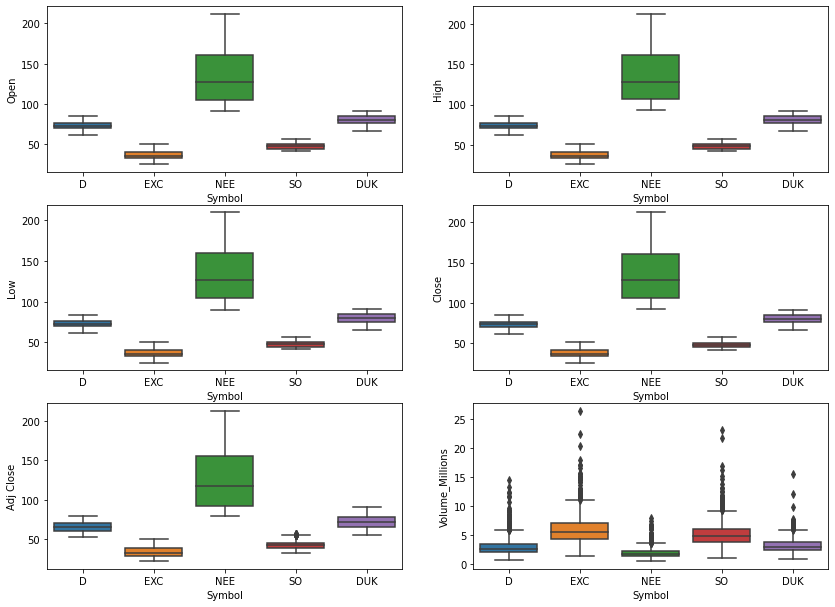

In [ ]:
# Seleccionar las columnas de interes
import matplotlib.pyplot as plt

l=[x for x in agg_df.columns if x not in ['Date','Volume']]
plt.figure(figsize=(14,14))
for x,column in zip(range(8),agg_df[l]):
  if column !='Symbol':
    #print(x)
    if x<=5:
      plt.subplot(3,2,x+1)
      sns.boxplot(data=agg_df[l], y=column, x=agg_df[l]['Symbol'])

# IQR

In [ ]:
l=[x for x in agg_df.columns if x not in ['Date','Volume','Symbol']]
datos= agg_df[l]
datos.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


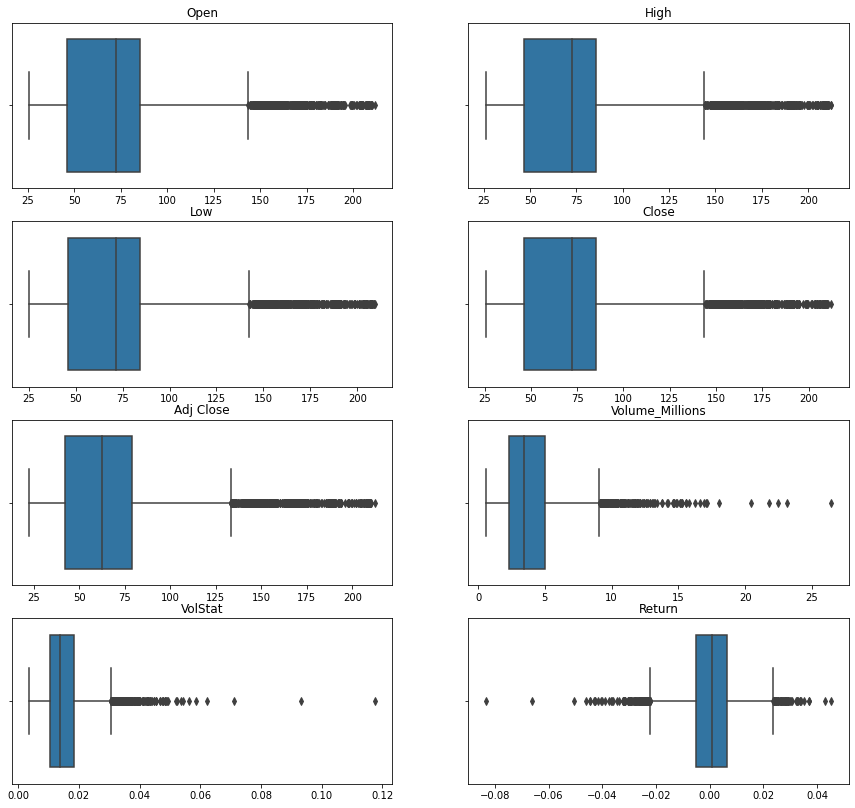

In [ ]:
plt.figure(figsize=(15,14))
for i,j in zip(range(8),datos.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=datos[j])
  plt.title(j)
  plt.xlabel('')

# Z score

In [ ]:
# Cargar datos
datos= agg_df[agg_df['Symbol']=='D']
l=[x for x in agg_df.columns if x not in ['Volume','Symbol']]
datos=datos[l]
datos['Date']=pd.to_datetime(datos['Date'])
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


In [ ]:
# Convertir a z score
datos_z=pd.DataFrame()
for j in datos.columns[1:]:
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std()
datos_z['Fecha']= datos.Date
datos_z.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01


In [ ]:
datos_z['Open_x']= datos_z['Open'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha,Open_x
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28,Normal
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29,Normal
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30,Normal
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31,Normal
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01,Normal


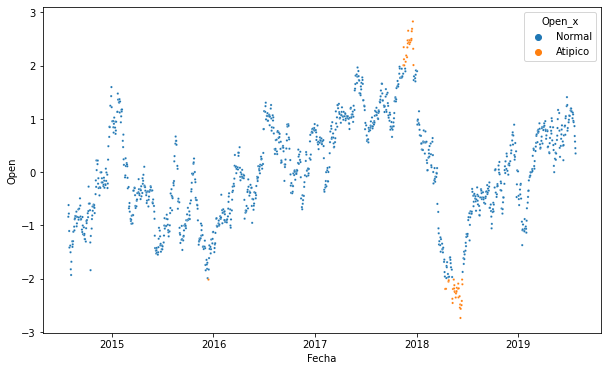

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=datos_z.Fecha, y= datos_z.Open, hue= datos_z['Open_x'],s= 5)

# Distancia multiple

In [ ]:
# Extraer columnas de interes
data_multiple=datos_z.drop(columns=['Open_x','Fecha'])
data_multiple.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [ ]:
def outlier_euclideano_d(x: pd.DataFrame, cutoff: float) -> pd.Series:
  """
  Identifica outliers en un DataFrame basado en la distancia Euclidiana de cada punto
  al centroide (media) de los datos. Los puntos cuya distancia (estandarizada
  mediante Z-score) supera un umbral son marcados como outliers.

  Args:
    x (pd.DataFrame): DataFrame que contiene únicamente columnas numéricas.
                      Se asume que los datos ya están normalizados/escalados
                      si las variables tienen diferentes rangos o unidades,
                      para que la distancia Euclidiana sea significativa.
    cutoff (float): El valor de corte para el Z-score de la distancia.
                    NOTA: En la implementación actual, este parámetro 'cutoff'
                    NO se utiliza; en su lugar, se usa un valor fijo de 3.

  Returns:
    pd.Series: Una Serie de pandas con el mismo índice que el DataFrame de entrada.
               Contiene 1 si la fila correspondiente es considerada un outlier,
               y 0 en caso contrario.
  """
  # Asegurarse de que la entrada es un DataFrame para evitar errores con .mean() etc.
  if not isinstance(x, pd.DataFrame):
      raise TypeError("La entrada 'x' debe ser un DataFrame de pandas.")

  # Inicializar una Serie de resultado con ceros.
  # Tendrá la misma longitud que el número de filas en el DataFrame 'x'.
  # Usar len(x) o x.shape[0] es más directo que len(x.iloc[:,1]).
  result_ = pd.Series([0] * len(x), index=x.index)

  # Calcular el centroide (la media de cada columna/variable).
  # data_mean será una Serie donde cada valor es la media de una columna de 'x'.
  data_mean = x.mean() [1,2,3,4,5,6] + 1

  # Calcular la distancia Euclidiana de cada punto (fila) al centroide.
  # 1. (x - data_mean): Resta el centroide a cada punto (fila). Gracias a broadcasting,
  #    la Serie data_mean se resta a cada fila de x. El resultado es un DataFrame
  #    de las mismas dimensiones que x, con las desviaciones respecto a la media.
  # 2. (** 2): Eleva al cuadrado cada desviación.
  # 3. np.sum(..., axis=1): Suma los cuadrados de las desviaciones a lo largo de las columnas (axis=1)
  #    para cada fila. Esto da el cuadrado de la distancia Euclidiana.
  # 4. np.sqrt(...): Calcula la raíz cuadrada para obtener la distancia Euclidiana final
  #    de cada punto al centroide. 'dist' es una Serie con estas distancias.
  dist = np.sqrt(np.sum(((x - data_mean) ** 2), axis=1))

  # Calcular la media de las distancias Euclidianas calculadas.
  dist_mean = dist.mean()

  # Calcular la desviación estándar de las distancias Euclidianas.
  dist_std = dist.std()

  # Evitar división por cero si todas las distancias son iguales (desv. estándar es 0)
  if dist_std == 0:
      # Si la desviación estándar es 0, no se pueden calcular Z-scores significativos.
      # Se podría decidir que no hay outliers o manejar este caso de otra forma.
      # Aquí simplemente retornamos la serie de ceros inicial.
      # Opcionalmente, se podría emitir una advertencia:
      # import warnings
      # warnings.warn("La desviación estándar de las distancias es cero. No se identificaron outliers.")
      return result_

  # Calcular el Z-score para cada distancia Euclidiana.
  # El Z-score mide cuántas desviaciones estándar una distancia particular
  # se aleja de la media de las distancias. Se usa np.abs para tomar el valor absoluto,
  # ya que solo nos interesa la magnitud de la desviación, no su signo.
  dist_zscore = np.abs((dist - dist_mean) / dist_std)

  # Identificar outliers: Marcar como 1 aquellos puntos cuya distancia (en términos de Z-score)
  # es mayor que el umbral
  outlier_mask = dist_zscore > cutoff
  result_[outlier_mask] = 1

  # Devolver la Serie que marca los outliers (1) y los no outliers (0).
  return result_

In [ ]:
# Crear una copia de los datos
euc_d = data_multiple.copy()
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [ ]:
# Aplicar la funcion
euc_d['outlier']=outlier_euclideano_d(euc_d,3)
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,outlier
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,0
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,0
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,0
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,0
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,0


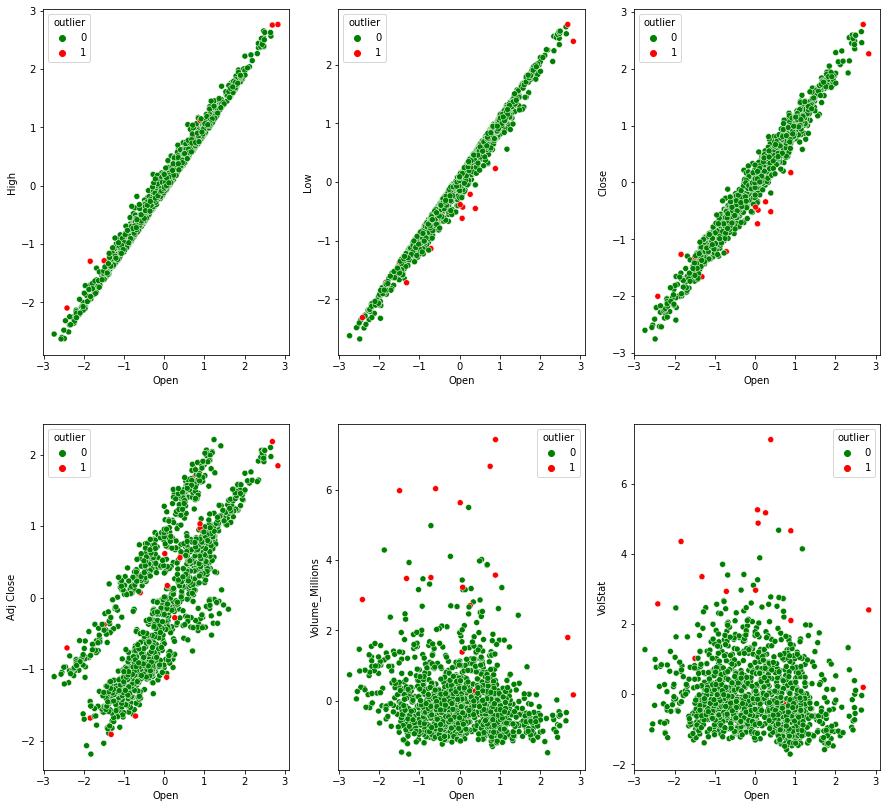

In [ ]:
plt.figure(figsize=(15,14))
plt.subplot(2,3,1)
sns.scatterplot(x="Open",y="High",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,2)
sns.scatterplot(x="Open",y="Low",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,3)
sns.scatterplot(x="Open",y="Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,4)
sns.scatterplot(x="Open",y="Adj Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,5)
sns.scatterplot(x="Open",y="Volume_Millions",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,6)
sns.scatterplot(x="Open",y="VolStat",data=euc_d,hue="outlier",palette=["green","red"])

# Imputacion

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
print(df.shape)
df.replace(0, np.nan, inplace=True)
df.head()

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [ ]:
# reemplazar con la mediana
from sklearn.impute import SimpleImputer

valores = df.values #numpy array con los valores
imputador = SimpleImputer(missing_values=np.nan, strategy='median') #definir el imputador
# transformar el dataset
transformados = imputador.fit_transform(valores)
transformados=pd.DataFrame(transformados)
print(transformados.head().round(2))

     0      1     2     3      4     5     6     7    8
0  6.0  148.0  72.0  35.0  125.0  33.6  0.63  50.0  1.0
1  1.0   85.0  66.0  29.0  125.0  26.6  0.35  31.0  1.0
2  8.0  183.0  64.0  29.0  125.0  23.3  0.67  32.0  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21.0  1.0
4  4.0  137.0  40.0  35.0  168.0  43.1  2.29  33.0  1.0


# Interpolacion

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
print(df.shape)
df.replace(0, np.nan, inplace=True)
print(df.head().round(2))

(768, 9)
     0      1     2     3      4     5     6   7    8
0  6.0  148.0  72.0  35.0    NaN  33.6  0.63  50  1.0
1  1.0   85.0  66.0  29.0    NaN  26.6  0.35  31  NaN
2  8.0  183.0  64.0   NaN    NaN  23.3  0.67  32  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21  NaN
4  NaN  137.0  40.0  35.0  168.0  43.1  2.29  33  1.0


In [ ]:
print(df.interpolate(method="linear").head().round(2))

     0      1     2     3      4     5     6   7    8
0  6.0  148.0  72.0  35.0    NaN  33.6  0.63  50  1.0
1  1.0   85.0  66.0  29.0    NaN  26.6  0.35  31  1.0
2  8.0  183.0  64.0  26.0    NaN  23.3  0.67  32  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21  1.0
4  3.0  137.0  40.0  35.0  168.0  43.1  2.29  33  1.0


In [ ]:
print(df.interpolate(method="polynomial",order=2).head().round(2))

      0      1     2      3      4     5     6   7    8
0  6.00  148.0  72.0  35.00    NaN  33.6  0.63  50  1.0
1  1.00   85.0  66.0  29.00    NaN  26.6  0.35  31  1.0
2  8.00  183.0  64.0  22.36    NaN  23.3  0.67  32  1.0
3  1.00   89.0  66.0  23.00   94.0  28.1  0.17  21  1.0
4  1.96  137.0  40.0  35.00  168.0  43.1  2.29  33  1.0


In [ ]:
df.interpolate(method='nearest',)

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,1.0
2,8.0,183.0,64.0,29.0,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1.0
4,1.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,1.0
764,2.0,122.0,70.0,27.0,180.0,36.8,0.340,27,1.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,1.0
766,1.0,126.0,60.0,23.0,NaN,30.1,0.349,47,1.0


# Datawig

In [ ]:
pip install datawig

     |████████████████████████████████| 61 kB 43 kB/s 
     |████████████████████████████████| 7.0 MB 23.6 MB/s 
     |████████████████████████████████| 10.4 MB 48.0 MB/s 
     |████████████████████████████████| 29.6 MB 1.2 MB/s 
     |████████████████████████████████| 13.8 MB 46.8 MB/s 
  Created wheel for datawig: filename=datawig-0.2.0-py3-none-any.whl size=72678 sha256=85cef3e54099a5bf981d664be21ccb34df70bd624aa4bbbf90d109da872db54d
  Stored in directory: /root/.cache/pip/wheels/23/44/aa/12cf6e868f0d71e3c4e57796330094461ade4cb3f1a3acd6c4
Successfully built datawig
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling

In [ ]:
df.columns= ['Col0','Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8']
df.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [ ]:
import datawig
import pandas as pd
import datawig

df_train, df_test = datawig.utils.random_split(df)

#Inicializar el modelo SimpleImputer
imputer = datawig.SimpleImputer(
    input_columns=['Col0','Col1','Col2'], # columnas que tienen la informacion con la columna a imputar
    output_column= 'Col4', # columna que queremos imputar
    output_path = 'imputer_model' # modelo y metricas
    )

In [ ]:
# Entrenar el modelo con data de entrenamiento y 50 epocas
imputer.fit(train_df=df_train, num_epochs=50)

# Imputar los missing values y devolver el dataframe original con la predicciones
imputed = imputer.predict(df_test)


2021-12-30 22:51:04,907 [INFO]  
========== start: fit model
2021-12-30 22:51:04,915 [WARNING]  Already bound, ignoring bind()
2021-12-30 22:51:04,965 [INFO]  Epoch[0] Batch [0-18]	Speed: 8211.21 samples/sec	cross-entropy=18.778674	Col4-accuracy=8.578947
2021-12-30 22:51:05,010 [INFO]  Epoch[0] Train-cross-entropy=18.152885
2021-12-30 22:51:05,017 [INFO]  Epoch[0] Train-Col4-accuracy=8.085714
2021-12-30 22:51:05,022 [INFO]  Epoch[0] Time cost=0.097
2021-12-30 22:51:05,041 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2021-12-30 22:51:05,052 [INFO]  Epoch[0] Validation-cross-entropy=32.327998
2021-12-30 22:51:05,058 [INFO]  Epoch[0] Validation-Col4-accuracy=0.000000
2021-12-30 22:51:05,103 [INFO]  Epoch[1] Batch [0-18]	Speed: 7942.87 samples/sec	cross-entropy=15.598518	Col4-accuracy=8.578947
2021-12-30 22:51:05,146 [INFO]  Epoch[1] Train-cross-entropy=15.708923
2021-12-30 22:51:05,153 [INFO]  Epoch[1] Train-Col4-accuracy=8.085714
2021-12-30 22:51:05,159 [INFO]  Epoch[1] 

In [ ]:
imputed

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col4_imputed
734,2.0,105.0,75.0,NaN,NaN,23.3,0.560,53,NaN,113.497543
213,NaN,140.0,65.0,26.0,130.0,42.6,0.431,24,1.0,175.098219
465,NaN,124.0,56.0,13.0,105.0,21.8,0.452,21,NaN,149.183241
206,8.0,196.0,76.0,29.0,280.0,37.5,0.605,57,1.0,168.510320
762,9.0,89.0,62.0,NaN,NaN,22.5,0.142,33,NaN,110.740118
...,...,...,...,...,...,...,...,...,...,...
123,5.0,132.0,80.0,NaN,NaN,26.8,0.186,69,NaN,166.950378
369,1.0,133.0,102.0,28.0,140.0,32.8,0.234,45,1.0,115.384075
320,4.0,129.0,60.0,12.0,231.0,27.5,0.527,31,NaN,158.350257
527,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24,NaN,136.906594


In [ ]:
print(imputed.head(20).round(2))

     Col0   Col1  Col2  Col3   Col4  Col5  Col6  Col7  Col8  Col4_imputed
734   2.0  105.0  75.0   NaN    NaN  23.3  0.56    53   NaN        113.50
213   NaN  140.0  65.0  26.0  130.0  42.6  0.43    24   1.0        175.10
465   NaN  124.0  56.0  13.0  105.0  21.8  0.45    21   NaN        149.18
206   8.0  196.0  76.0  29.0  280.0  37.5  0.60    57   1.0        168.51
762   9.0   89.0  62.0   NaN    NaN  22.5  0.14    33   NaN        110.74
542  10.0   90.0  85.0  32.0    NaN  34.9  0.82    56   1.0        108.02
255   1.0  113.0  64.0  35.0    NaN  33.6  0.54    21   1.0        130.35
412   1.0  143.0  84.0  23.0  310.0  42.4  1.08    22   NaN        146.46
328   2.0  102.0  86.0  36.0  120.0  45.5  0.13    23   1.0        121.36
583   8.0  100.0  76.0   NaN    NaN  38.7  0.19    42   NaN        131.35
346   1.0  139.0  46.0  19.0   83.0  28.7  0.65    22   NaN        164.06
427   1.0  181.0  64.0  30.0  180.0  34.1  0.33    38   1.0        215.98
649   NaN  107.0  60.0  25.0    NaN  2

# Actividad colaborativa

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv')
df.index= df.formatted_date
df= df.drop(columns='formatted_date')
df.head()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
2016-02-01,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

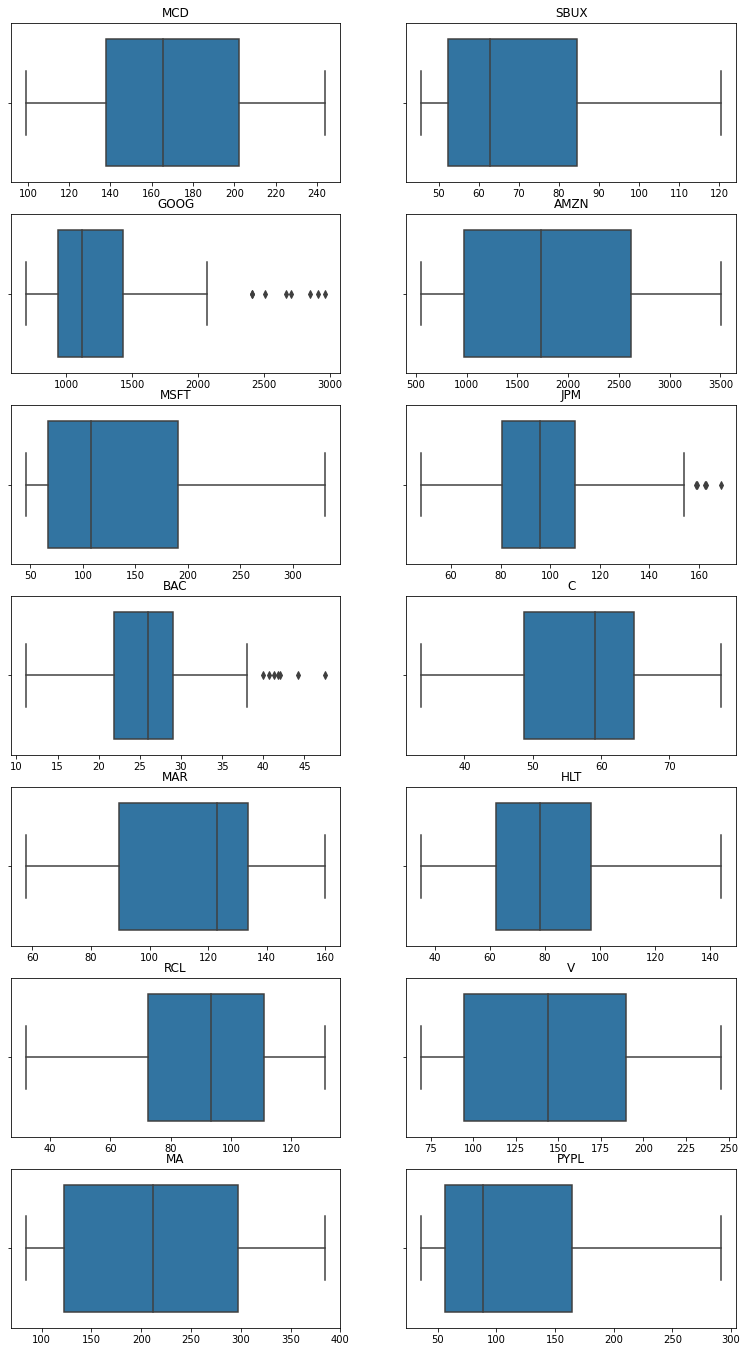

In [ ]:
# Outliers
plt.figure(figsize=(13,24))
for i,j in zip(range(14),df.columns):
  plt.subplot(7,2,i+1)
  sns.boxplot(x=df[j],orient='v')
  plt.title(j)
  plt.xlabel('')

In [ ]:
df.corr()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
MCD,1.000000,0.911649,0.872950,0.915207,0.921861,0.900587,0.857553,0.598726,0.758567,0.941815,0.052275,0.961073,0.956230,0.889973
SBUX,0.911649,1.000000,0.900343,0.874861,0.925871,0.854682,0.775915,0.463075,0.608303,0.895421,-0.138369,0.908692,0.907381,0.921438
GOOG,0.872950,0.900343,1.000000,0.898136,0.961937,0.909442,0.876196,0.530359,0.647768,0.905074,-0.130685,0.855338,0.841940,0.927271
AMZN,0.915207,0.874861,0.898136,1.000000,0.963040,0.831325,0.773567,0.414525,0.596446,0.859951,-0.207798,0.948422,0.951015,0.959953
MSFT,0.921861,0.925871,0.961937,0.963040,1.000000,0.873916,0.818282,0.436713,0.596887,0.897585,-0.232318,0.929751,0.926621,0.951394
JPM,0.900587,0.854682,0.909442,0.831325,0.873916,1.000000,0.982349,0.794576,0.872046,0.978772,0.202581,0.871820,0.859420,0.844586
BAC,0.857553,0.775915,0.876196,0.773567,0.818282,0.982349,1.000000,0.841762,0.899805,0.950060,0.292480,0.805341,0.789793,0.773794
C,0.598726,0.463075,0.530359,0.414525,0.436713,0.794576,0.841762,1.000000,0.913796,0.740547,0.686983,0.531859,0.510164,0.439464
MAR,0.758567,0.608303,0.647768,0.596446,0.596887,0.872046,0.899805,0.913796,1.000000,0.871625,0.581135,0.692143,0.679711,0.580950
HLT,0.941815,0.895421,0.905074,0.859951,0.897585,0.978772,0.950060,0.740547,0.871625,1.000000,0.170140,0.912165,0.905176,0.862439


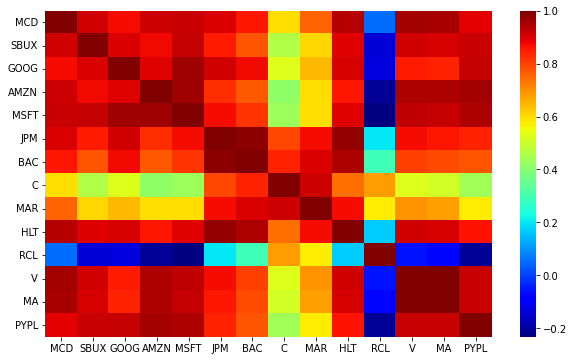

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), cmap='jet')

In [ ]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

"""
calcula todas las correlaciones absolutas entre pares de columnas en tu DataFrame data y
las almacena en una estructura de Serie ( au_corr ) que es fácil de consultar o filtrar.
El índice de esta Serie te dice qué par de columnas se está correlacionando,
y el valor es la fuerza (valor absoluto) de esa correlación.
"""
def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(df, 10)) # Saquemos el top 10

Correlaciones mas grandes
V     MA      0.996748
JPM   BAC     0.982349
      HLT     0.978772
AMZN  MSFT    0.963040
GOOG  MSFT    0.961937
MCD   V       0.961073
AMZN  PYPL    0.959953
MCD   MA      0.956230
MSFT  PYPL    0.951394
AMZN  MA      0.951015
dtype: float64
